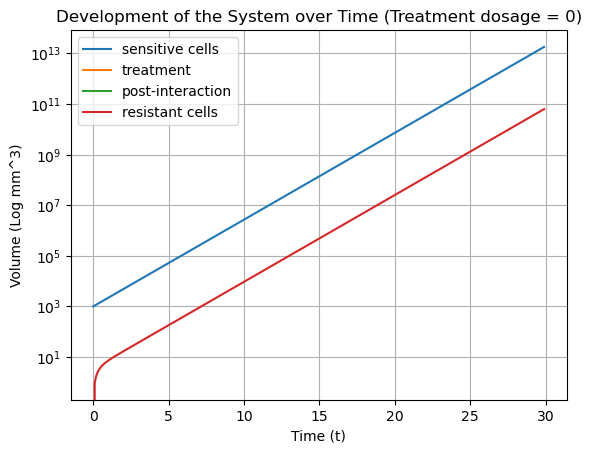

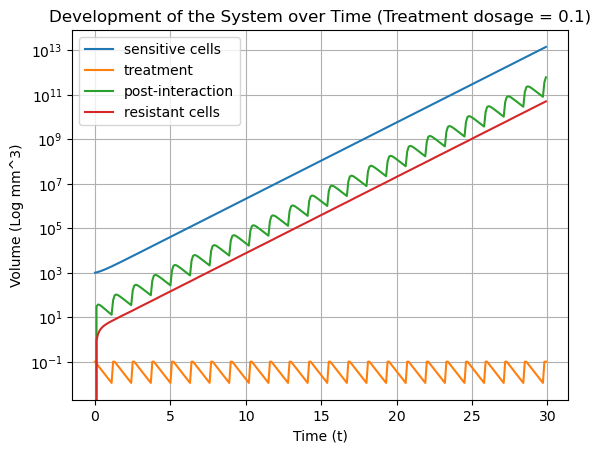

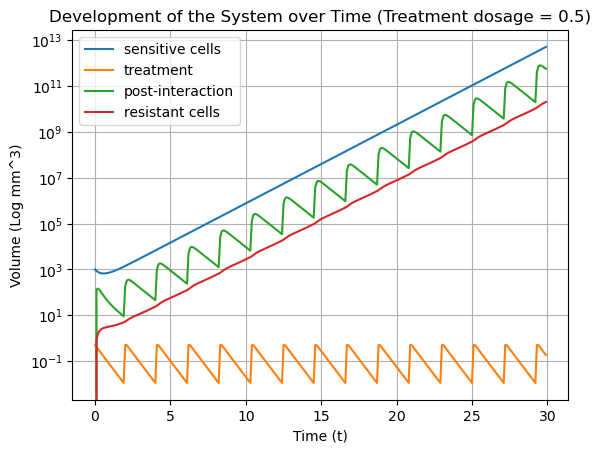

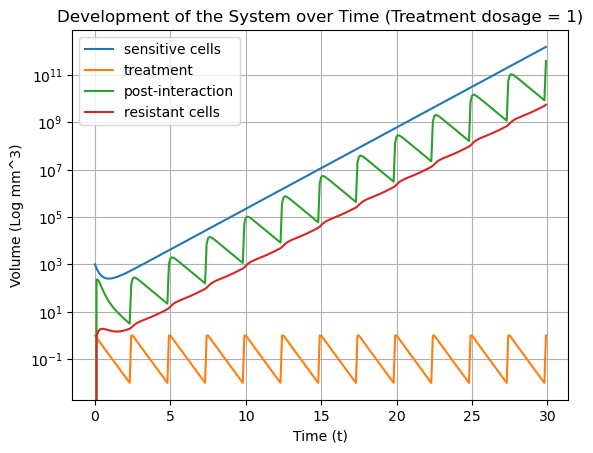

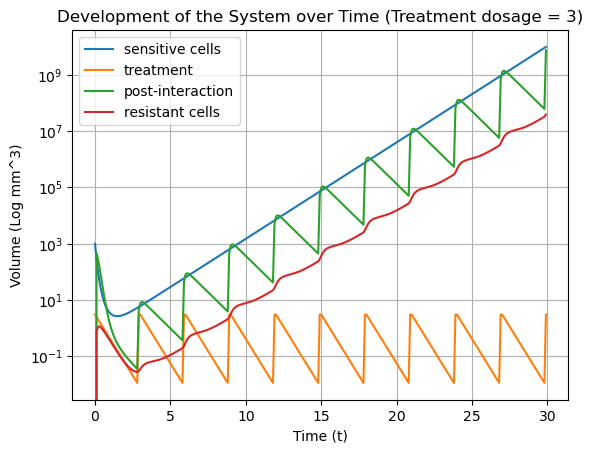

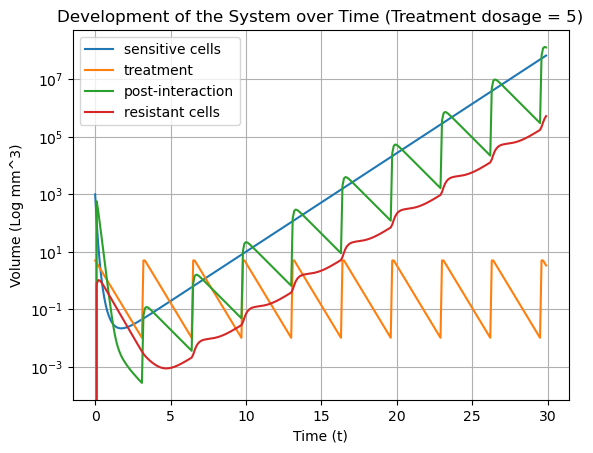

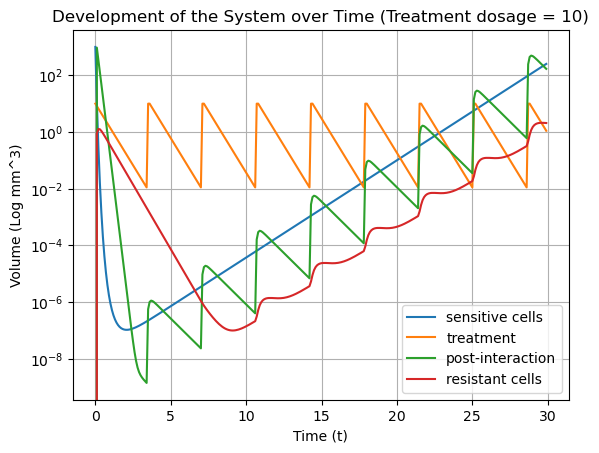

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Rate constants
r = 1           # sensitive birth
rp = 2          # resistant birth
k = 5           # treatment interaction
kp = 0.1        # resistant death
m = 0.2         # sensitive death
mp = 0.01       # sensitive mutation
delta = 2       # med degen rate 0.1
beta = 10       # post-interaction death
gamma = 0.01    # post-interaction mutate
C_3 = 0
C_4 = 0

# Time points
h = 0.1
n_steps = 300
t = np.arange(0, n_steps * h, h)

# Compute and plot the values of A, B, C, and A' over time
def compute_and_plot(C_2):
    C_1 = 1000 * np.exp(-k / delta * C_2)
    A_values = np.zeros(n_steps)
    B_values = np.zeros(n_steps)
    C_values = np.zeros(n_steps)
    Ap_values = np.zeros(n_steps)

    def A(t):
        return C_1 * np.exp((r - m - mp) * t + (k * C_2) * np.exp(-delta * t) / delta)

    def B(t):
        return C_2 * np.exp(-delta * t)

    # Compute A and B values
    counter = 0
    for i in range(n_steps):
        A_values[i] = A(t[i])
        B_values[i] = B(t[counter])
        counter += 1
        if B_values[i] < 0.01 and i != 0:
            B_values[i] = B(0)
            counter = 0

    # Numerical integration for C(t)
    def compute_C_values():
        C_integral = np.zeros(n_steps)
        for i in range(1, n_steps):
            integrand = k * A_values[:i+1] * B_values[:i+1] * np.exp((beta + gamma) * t[:i+1])
            C_integral[i] = np.trapz(integrand, t[:i+1])
        return np.exp(-(beta + gamma) * t) * C_integral + C_3 * np.exp(-(beta + gamma) * t)
        # Chat had (1 + C_integral) instead

    # Numerical integration for Ap(t)
    def compute_Ap_values(C_values):
        Ap_integral = np.zeros(n_steps)
        for i in range(1, n_steps):
            integrand = np.exp((rp + kp) * t[:i+1]) * (mp * A_values[:i+1] + gamma * C_values[:i+1])
            Ap_integral[i] = np.trapz(integrand, t[:i+1])
        return np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

    # Compute C(t) and Ap(t)
    C_values = compute_C_values()
    Ap_values = compute_Ap_values(C_values)

    # Plot results
    plt.figure()
    plt.plot(t, A_values, label="sensitive cells")
    plt.plot(t, B_values, label="treatment")
    plt.plot(t, C_values, label="post-interaction")
    plt.plot(t, Ap_values, label="resistant cells")
    plt.xlabel("Time (t)")
    plt.ylabel("Volume (Log mm^3)")
    plt.yscale("log")
    plt.legend()
    plt.title(f"Development of the System over Time (Treatment dosage = {C_2})")
    plt.grid()
    plt.show()

# Plot for each case
compute_and_plot(C_2=0)  # Case 1: C_2 = 0
compute_and_plot(C_2=0.1)# Case *: C_2 = 0.1
compute_and_plot(C_2=0.5)# Case *: C_2 = 0.5
compute_and_plot(C_2=1)  # Case 2: C_2 = 1
compute_and_plot(C_2=3)  # Case 3: C_2 = 3
compute_and_plot(C_2=5)  # Case 4: C_2 = 5
compute_and_plot(C_2=10) # Case 5: C_2 = 10

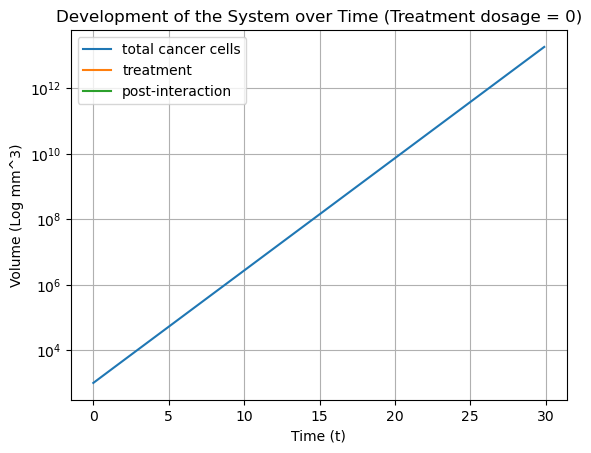

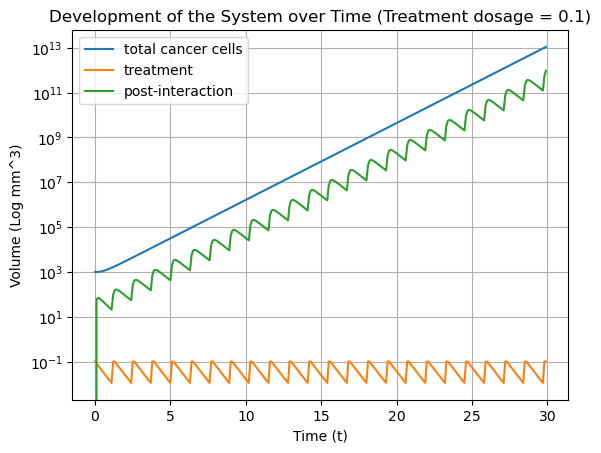

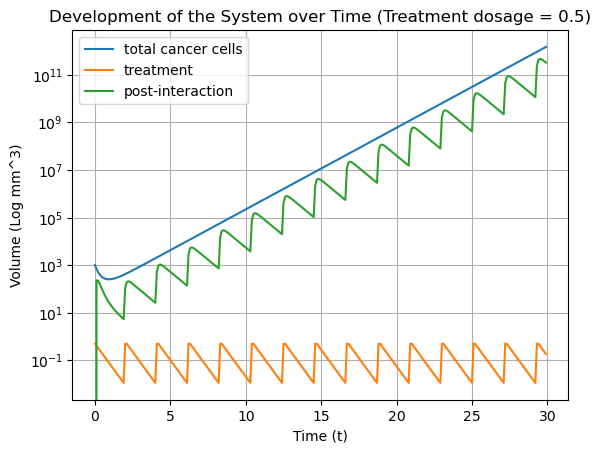

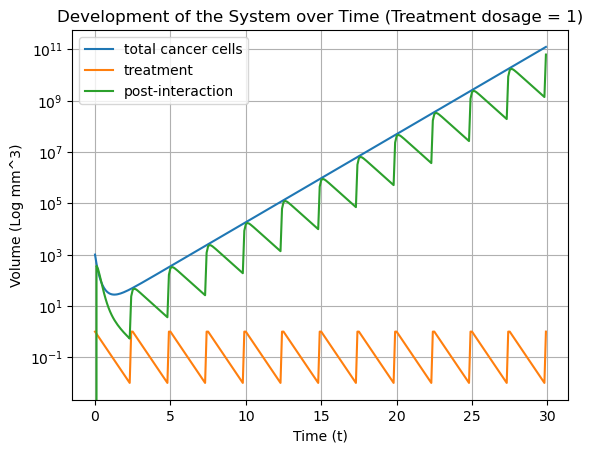

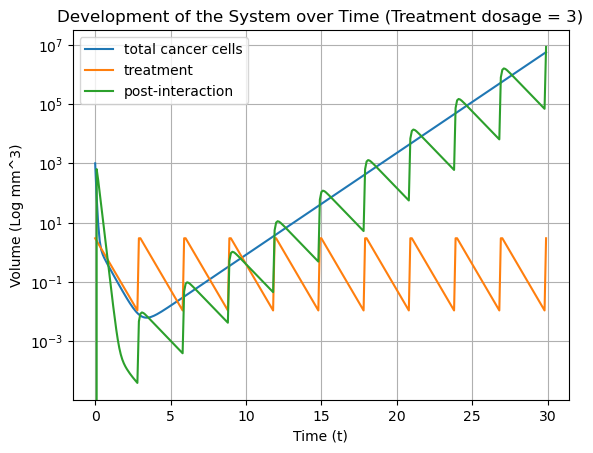

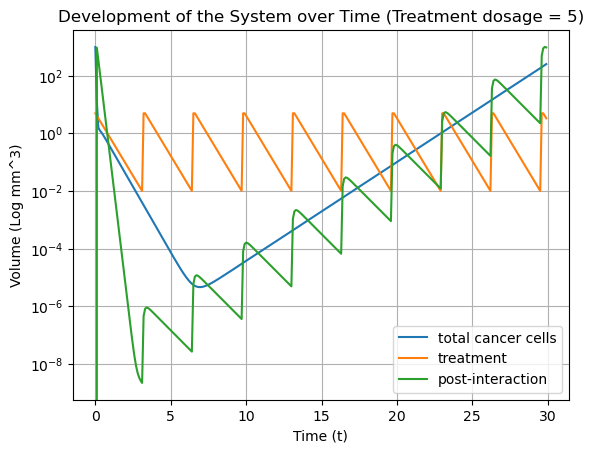

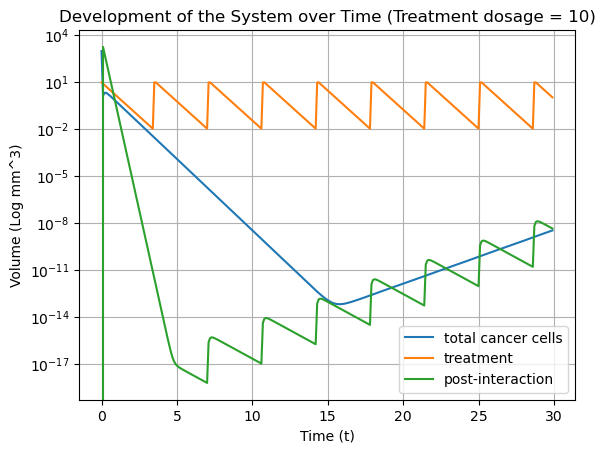

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Rate constants
r = 1           # sensitive birth
rp = 2          # resistant birth
k = 10           # treatment interaction
kp = 0.1        # resistant death
m = 0.2         # sensitive death
mp = 0.01       # sensitive mutation
delta = 2       # med degen rate 0.1
beta = 10       # post-interaction death
gamma = 0.01    # post-interaction mutate
C_3 = 0
C_4 = 0

# Time points
h = 0.1
n_steps = 300
t = np.arange(0, n_steps * h, h)

# Compute and plot the values of A, B, C, and A' over time
def compute_and_plot(C_2):
    C_1 = 1000 * np.exp(-k / delta * C_2)
    A_values = np.zeros(n_steps)
    B_values = np.zeros(n_steps)
    C_values = np.zeros(n_steps)
    Ap_values = np.zeros(n_steps)

    def A(t):
        return C_1 * np.exp((r - m - mp) * t + (k * C_2) * np.exp(-delta * t) / delta)

    def B(t):
        return C_2 * np.exp(-delta * t)

    # Compute A and B values
    counter = 0
    for i in range(n_steps):
        A_values[i] = A(t[i])
        B_values[i] = B(t[counter])
        counter += 1
        if B_values[i] < 0.01 and i != 0:
            B_values[i] = B(0)
            counter = 0

    # Numerical integration for C(t)
    def compute_C_values():
        C_integral = np.zeros(n_steps)
        for i in range(1, n_steps):
            integrand = k * A_values[:i+1] * B_values[:i+1] * np.exp((beta + gamma) * t[:i+1])
            C_integral[i] = np.trapz(integrand, t[:i+1])
        return np.exp(-(beta + gamma) * t) * C_integral + C_3 * np.exp(-(beta + gamma) * t)
        # Chat had (1 + C_integral) instead

    # Numerical integration for Ap(t)
    def compute_Ap_values(C_values):
        Ap_integral = np.zeros(n_steps)
        for i in range(1, n_steps):
            integrand = np.exp((rp + kp) * t[:i+1]) * (mp * A_values[:i+1] + gamma * C_values[:i+1])
            Ap_integral[i] = np.trapz(integrand, t[:i+1])
        return np.exp(-(rp + kp) * t) * Ap_integral + C_4 * np.exp(-(rp + kp) * t)

    # Compute C(t) and Ap(t)
    C_values = compute_C_values()
    Ap_values = compute_Ap_values(C_values)
    total_cell = A_values + Ap_values

    # Plot results
    plt.figure()
    plt.plot(t, total_cell, label="total cancer cells")
    plt.plot(t, B_values, label="treatment")
    plt.plot(t, C_values, label="post-interaction")
    # plt.plot(t, Ap_values, label="resistant cells")
    plt.xlabel("Time (t)")
    plt.ylabel("Volume (Log mm^3)")
    plt.yscale("log")
    plt.legend()
    plt.title(f"Development of the System over Time (Treatment dosage = {C_2})")
    plt.grid()
    plt.show()

# Plot for each case
compute_and_plot(C_2=0)  # Case 1: C_2 = 0
compute_and_plot(C_2=0.1)# Case *: C_2 = 0.1
compute_and_plot(C_2=0.5)# Case *: C_2 = 0.5
compute_and_plot(C_2=1)  # Case 2: C_2 = 1
compute_and_plot(C_2=3)  # Case 3: C_2 = 3
compute_and_plot(C_2=5)  # Case 4: C_2 = 5
compute_and_plot(C_2=10) # Case 5: C_2 = 10